### 1.3 The Gray-Scott model - A reaction-diffusion system

In [2]:
import numpy as np
import matplotlib.pyplot as plt

MEDIA_PATH = 'media/ex2/'

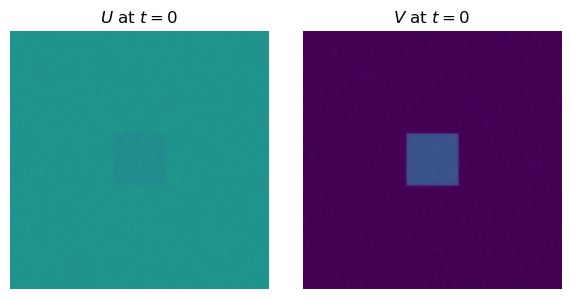

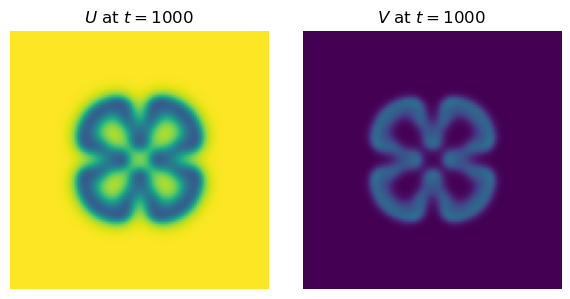

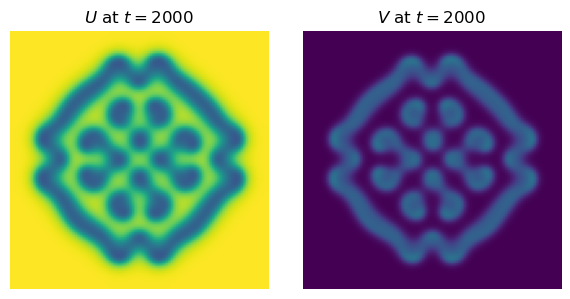

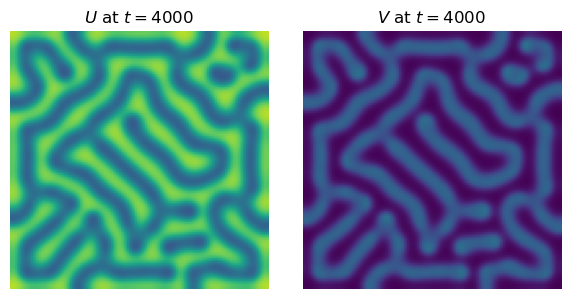

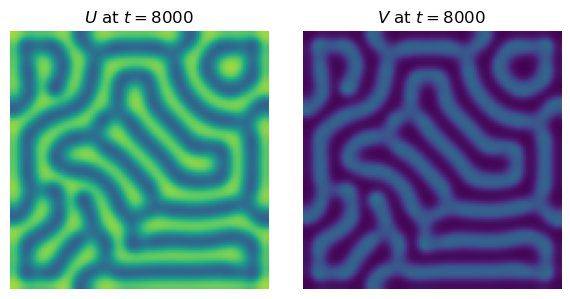

In [3]:
class GrayScottModel:
    def __init__(self, size=100, Du=0.16, Dv=0.08, f=0.035, k=0.060):
        self.size = size
        self.Du = Du
        self.Dv = Dv
        self.f = f
        self.k = k
        self.dt = 1.0
        self.dx = 1.0
        
        # initializing U and V
        self.U = np.ones((self.size, self.size)) * 0.5
        self.V = np.zeros((self.size, self.size))
        
        # Create a small square (V = 0.25)
        square_size = 20
        square_start = self.size // 2 - square_size // 2
        square_end = square_start + square_size
        self.U[square_start:square_end, square_start:square_end] = 0.5
        self.V[square_start:square_end, square_start:square_end] = 0.25
        
        # Add small amount of noise
        self.U += np.random.normal(0, 0.01, (self.size, self.size))
        self.V += np.random.normal(0, 0.01, (self.size, self.size))
        
    # CHECK OTHER FINITE DIFFERENCE SCHEMES IF TIME REMAINS
    def laplacian(self, Z):
        Z_top = Z[:-2, 1:-1]
        Z_left = Z[1:-1, :-2]
        Z_bottom = Z[2:, 1:-1]
        Z_right = Z[1:-1, 2:]
        Z_center = Z[1:-1, 1:-1]
        return (Z_top + Z_left + Z_bottom + Z_right - 4 * Z_center) / self.dx**2
    
    def update(self):
        lapU = self.laplacian(self.U)
        lapV = self.laplacian(self.V)
        
        self.U[1:-1, 1:-1] += self.dt * (self.Du * lapU - self.U[1:-1, 1:-1] * self.V[1:-1, 1:-1]**2 + self.f * (1 - self.U[1:-1, 1:-1]))
        self.V[1:-1, 1:-1] += self.dt * (self.Dv * lapV + self.U[1:-1, 1:-1] * self.V[1:-1, 1:-1]**2 - (self.f + self.k) * self.V[1:-1, 1:-1])
        
        # Neumann boundary conditions (zero-gradient)
        for Z in [self.U, self.V]:
            Z[0, :], Z[-1, :], Z[:, 0], Z[:, -1] = Z[1, :], Z[-2, :], Z[:, 1], Z[:, -2]
    
    def run_simulation(self, T=8000, visualize_steps=[], save_steps=[]):
        for t in range(T):
            self.update()
            if visualize_steps and t in visualize_steps:
                fig = self.visualize(t)
                plt.show(fig)
                if t in save_steps:
                    fig.savefig(f'{MEDIA_PATH}/gray_scott_t_{t}.png')
    
    def visualize(self, t):
        fig = plt.figure(figsize=(6, 3), tight_layout=True)
        ax = fig.add_subplot(1, 2, 1)
        ax.imshow(self.U, vmin=0, vmax=1)
        ax.set_title(f'$U$ at $t={t}$')
        ax.axis('off')
        ax2 = fig.add_subplot(1, 2, 2)
        ax2.imshow(self.V, vmin=0, vmax=1)
        ax2.set_title(f'$V$ at $t={t}$')
        ax2.axis('off')
        return fig

# Create a Gray-Scott model instance
model = GrayScottModel()
# Run the simulation and visualize at specific time steps
model.run_simulation(T=8001, visualize_steps=[0, 1000, 2000, 4000, 8000], save_steps=[0, 8000])